# 데이터 탐색 및 전처리

step1) 필요한 python 라이브러리 import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#################### matplotlib 한글 깨짐 현상 해결 ####################
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rcParams['axes.unicode_minus'] = False
# path = 'C:\\Windows\\Fonts\\H2GTRM.TTF'
# font_name = fm.FontProperties(fname=path, size=10).get_name()
# plt.rc('font', family=font_name)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#################### 필요한 python lib import ###########################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

import time
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer

from scipy.stats import pearsonr, chi2_contingency
from itertools import combinations
from sklearn.decomposition import PCA

from IPython.display import Image
import warnings
warnings.filterwarnings(action='ignore')

############################################## 00. 필요한 파이썬 라이브러리 불러오기 #####################################################
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.decomposition import PCA 

import scipy.cluster.hierarchy as shc

from scipy.stats import pearsonr, chi2_contingency
from itertools import combinations

import warnings
warnings.filterwarnings('ignore')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,174 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

## 데이터 불러오기

step2 ) segment할 데이터 불러오기(pandas의 data frame 형식으로)

* **굵은 텍스트** [olist dataset] : https://www.kaggle.com/olistbr/brazilian-ecommerce

In [ ]:
df_orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/olist_orders_dataset.csv',sep=',', parse_dates=['order_purchase_timestamp', 'order_estimated_delivery_date', 'order_delivered_customer_date'])
df_customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/olist_customers_dataset.csv',sep=',')
df_payments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/olist_order_payments_dataset.csv',sep=',')
df_reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/olist_order_reviews_dataset.csv',sep=',')
df_items = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/olist_order_items_dataset.csv',sep=',')
df_products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/olist_products_dataset.csv',sep=',')
product_translations = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/product_category_name_translation.csv',sep=',')
df_sellers= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/olist_sellers_dataset.csv',sep=',')

In [ ]:
df_pd = df_customers.merge(df_orders, how = 'inner', left_on = 'customer_id', right_on = 'customer_id')
df_pd = df_pd .merge(df_items, how = 'inner', left_on = 'order_id', right_on = 'order_id')
df_pd = df_pd .merge(df_products, how = 'inner', left_on = 'product_id', right_on = 'product_id')
df_pd = df_pd .merge(df_reviews, how = 'inner', left_on = 'order_id', right_on = 'order_id')
df_pd = df_pd .merge(product_translations, how = 'inner', left_on = 'product_category_name', right_on = 'product_category_name')

In [ ]:
df_pd.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54.0,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,54.0,64.0,31.0,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,54.0,64.0,31.0,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,54.0,64.0,31.0,251191809e37c1cffc16865947c18a4d,3,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,54.0,64.0,31.0,f7123bac5b91a0e2e38d8b41fd1206f4,4,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,office_furniture


In [ ]:
#데이터의 모양 알아보기
df_pd.shape

(110750, 33)

In [ ]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110750 entries, 0 to 110749
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    110750 non-null  object        
 1   customer_unique_id             110750 non-null  object        
 2   customer_zip_code_prefix       110750 non-null  int64         
 3   customer_city                  110750 non-null  object        
 4   customer_state                 110750 non-null  object        
 5   order_id                       110750 non-null  object        
 6   order_status                   110750 non-null  object        
 7   order_purchase_timestamp       110750 non-null  datetime64[ns]
 8   order_approved_at              110736 non-null  object        
 9   order_delivered_carrier_date   109605 non-null  object        
 10  order_delivered_customer_date  108457 non-null  datetime64[ns]
 11  

In [ ]:
# 예측 모델을 만드는데 필요없는 칼럼들 제거
df_pd = df_pd.drop(['review_comment_title', 'review_comment_message', 'product_weight_g',
'review_creation_date', 'product_length_cm', 'product_height_cm','product_width_cm',
'review_answer_timestamp', 'review_id', 'order_approved_at', 'order_status', 'order_id',
'customer_id', 'order_item_id', 'order_approved_at','product_category_name'],axis=1)


In [ ]:
# 결측값 확인
df_pd.isnull().sum()

customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_purchase_timestamp            0
order_delivered_carrier_date     1145
order_delivered_customer_date    2293
order_estimated_delivery_date       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
review_score                        0
product_category_name_english       0
dtype: int64

In [ ]:
# 'order_delivered_carrier_date ','order_delivered_customer_date ' - 결u측값 존재 bt,이 두개의 칼럼은 리뷰점수에 상당한 영향을 주는 배송과정에 관한 정보를주기에 중요
# 결측값이 얼마 되지 않아 우리는 결측값이 있는 행을 제거 (axis=0)
df_pd.dropna(axis=0)

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,review_score,product_category_name_english
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,2017-05-16 15:05:35,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,41.0,1141.0,1.0,4,office_furniture
1,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,2017-11-09 00:50:13,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,41.0,1141.0,1.0,1,office_furniture
2,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,2017-11-09 00:50:13,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,41.0,1141.0,1.0,1,office_furniture
3,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,2017-05-07 20:11:26,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,41.0,1141.0,1.0,3,office_furniture
4,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2018-02-03 19:45:40,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,41.0,1141.0,1.0,4,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110745,4b7f26d90bb264ade7e4281db1b739f1,13088,campinas,SP,2018-07-17 13:32:49,2018-07-19 15:00:00,2018-07-23 18:20:48,2018-07-27,54b391a91c3b1a1e22af86434155834d,2ea0861cc19e94cad86438c984c52da4,2018-07-24 04:35:13,9.80,13.68,35.0,99.0,1.0,1,arts_and_craftmanship
110746,215c346bf0164978a8725f01f7715ab4,37150,carmo do rio claro,MG,2018-08-22 20:16:37,2018-08-24 13:57:00,2018-08-30 22:32:31,2018-09-12,43506d2b6b5e0535079f88c7dc51c4de,05730013efda596306417c3b09302475,2018-08-29 03:05:13,238.00,68.72,54.0,746.0,5.0,5,arts_and_craftmanship
110747,e839774c9d31569dba47946296e58b33,11035,santos,SP,2018-07-25 10:27:00,2018-07-25 14:53:00,2018-07-27 01:27:37,2018-08-02,3a96bcbf644a5d390107570628568026,70126eecc6aa1274392a1743866e9678,2018-07-31 10:35:17,19.80,7.40,53.0,529.0,2.0,5,arts_and_craftmanship
110748,d8bee9ec375c3a0f9ef8ed7456a51dcd,76940,rolim de moura,RO,2017-01-26 11:09:00,2017-01-27 14:59:35,2017-02-14 16:24:01,2017-03-07,6c7a0a349ad11817745e3ad58abd5c79,48162d548f5b1b11b9d29d1e01f75a61,2017-01-30 11:09:00,183.29,25.77,55.0,506.0,1.0,4,security_and_services


In [ ]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110750 entries, 0 to 110749
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             110750 non-null  object        
 1   customer_zip_code_prefix       110750 non-null  int64         
 2   customer_city                  110750 non-null  object        
 3   customer_state                 110750 non-null  object        
 4   order_purchase_timestamp       110750 non-null  datetime64[ns]
 5   order_delivered_carrier_date   109605 non-null  object        
 6   order_delivered_customer_date  108457 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110750 non-null  datetime64[ns]
 8   product_id                     110750 non-null  object        
 9   seller_id                      110750 non-null  object        
 10  shipping_limit_date            110750 non-null  object        
 11  

## Feature 탐색

총 Feature 개수 확인

In [ ]:
print(df_pd.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110750 entries, 0 to 110749
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             110750 non-null  object        
 1   customer_zip_code_prefix       110750 non-null  int64         
 2   customer_city                  110750 non-null  object        
 3   customer_state                 110750 non-null  object        
 4   order_purchase_timestamp       110750 non-null  datetime64[ns]
 5   order_delivered_carrier_date   109605 non-null  object        
 6   order_delivered_customer_date  108457 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110750 non-null  datetime64[ns]
 8   product_id                     110750 non-null  object        
 9   seller_id                      110750 non-null  object        
 10  shipping_limit_date            110750 non-null  object        
 11  

## 숫자형 Feature

In [ ]:
# price + freight_value = payment_value (컬럼을 만들어쪙)
df_pd['total_cost_value'] = df_pd['price'] + df_pd['freight_value']

In [ ]:
#데이터 확인
df_pd.select_dtypes(include=['number']).head()

,customer_zip_code_prefix,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,review_score,total_cost_value
0,14409,124.99,21.88,41.0,1141.0,1.0,4,146.87
1,68030,112.99,24.90,41.0,1141.0,1.0,1,137.89
2,68030,112.99,24.90,41.0,1141.0,1.0,1,137.89
3,92480,124.99,15.62,41.0,1141.0,1.0,3,140.61
4,25931,106.99,30.59,41.0,1141.0,1.0,4,137.58


In [ ]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110750 entries, 0 to 110749
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             110750 non-null  object        
 1   customer_zip_code_prefix       110750 non-null  int64         
 2   customer_city                  110750 non-null  object        
 3   customer_state                 110750 non-null  object        
 4   order_purchase_timestamp       110750 non-null  datetime64[ns]
 5   order_delivered_carrier_date   109605 non-null  object        
 6   order_delivered_customer_date  108457 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110750 non-null  datetime64[ns]
 8   product_id                     110750 non-null  object        
 9   seller_id                      110750 non-null  object        
 10  shipping_limit_date            110750 non-null  object        
 11  

In [ ]:
num_feat = df_pd.select_dtypes('number').columns.values
df_pd_num = df_pd[num_feat].copy()

In [ ]:
#Feature 별 유일한 값 개수 확인
print(df_pd_num.nunique().sort_values())

review_score                      5
product_photos_qty               19
product_name_lenght              66
product_description_lenght     2958
price                          5879
freight_value                  6954
customer_zip_code_prefix      14907
total_cost_value              28805
dtype: int64


In [ ]:
df_pd_num.shape

(110750, 8)

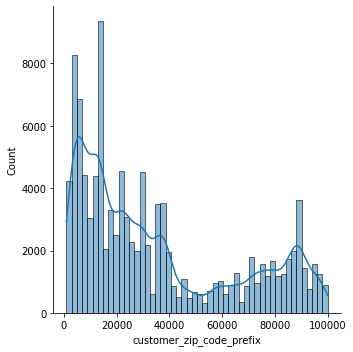

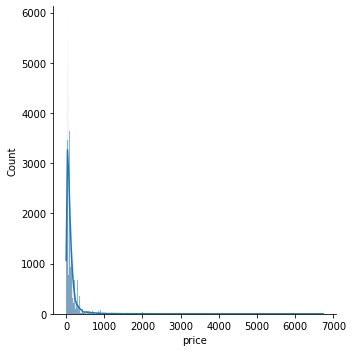

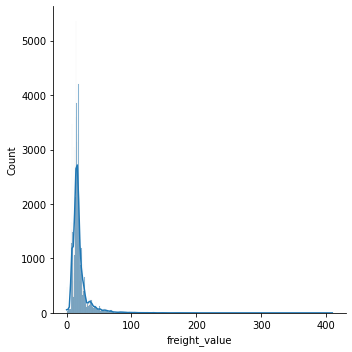

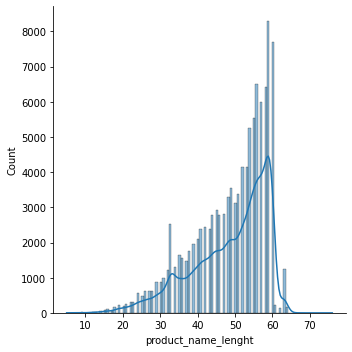

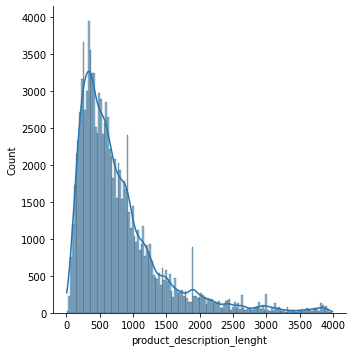

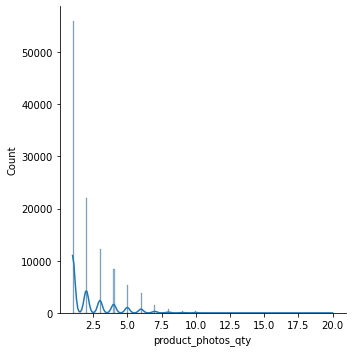

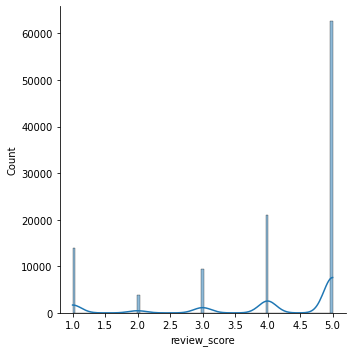

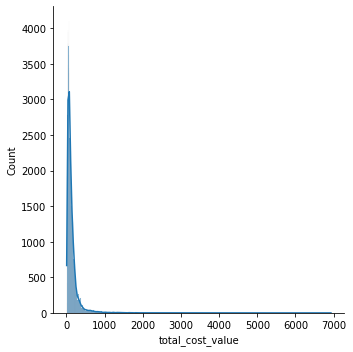

In [ ]:
#Feature Skewness 확인
col_df_pd_num = df_pd_num.columns.values
for i in range(0,len(col_df_pd_num)):
    sns.displot(df_pd_num[col_df_pd_num[i]],kde=True) # kde : kernel density

In [ ]:
df_pd_num.describe()

,customer_zip_code_prefix,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,review_score,total_cost_value
count,110750.000000,110750.000000,110750.000000,110750.000000,110750.000000,110750.000000,110750.000000,110750.000000
mean,35123.682257,120.475691,20.012513,48.776135,786.798230,2.206980,4.035395,140.488204
std,29882.476174,181.861574,15.815047,10.025553,651.643826,1.719776,1.385325,188.940634
min,1003.000000,0.850000,0.000000,5.000000,4.000000,1.000000,1.000000,6.080000
25%,11310.000000,39.900000,13.080000,42.000000,348.000000,1.000000,4.000000,55.240000
50%,24320.000000,74.900000,16.290000,52.000000,601.000000,1.000000,5.000000,92.255000
75%,59054.000000,134.900000,21.170000,57.000000,985.000000,3.000000,5.000000,158.070000
max,99980.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,5.000000,6929.310000


In [ ]:
df_pd_num.isnull().sum()

customer_zip_code_prefix      0
price                         0
freight_value                 0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
review_score                  0
total_cost_value              0
dtype: int64

In [ ]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110750 entries, 0 to 110749
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             110750 non-null  object        
 1   customer_zip_code_prefix       110750 non-null  int64         
 2   customer_city                  110750 non-null  object        
 3   customer_state                 110750 non-null  object        
 4   order_purchase_timestamp       110750 non-null  datetime64[ns]
 5   order_delivered_carrier_date   109605 non-null  object        
 6   order_delivered_customer_date  108457 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110750 non-null  datetime64[ns]
 8   product_id                     110750 non-null  object        
 9   seller_id                      110750 non-null  object        
 10  shipping_limit_date            110750 non-null  object        
 11  

In [ ]:
num_feat = df_pd_num.columns.values
comb_num_feat = np.array(list(combinations(num_feat, 2)))
corr_num_feat = np.array([])
for comb in comb_num_feat:
    corr = pearsonr(df_pd_num[comb[0]], df_pd_num[comb[1]])[0]
    corr_num_feat = np.append(corr_num_feat, corr)

In [ ]:
high_corr_num = comb_num_feat[np.abs(corr_num_feat) >= 0.9]
high_corr_num

array([['price', 'total_cost_value']], dtype='<U26')

In [ ]:
# plotly 안 보이는 문제 해결

import plotly.io as pio
pio.renderers.default = 'notebook_connected'
pio.renderers
pio.renderers.default = 'colab'
pio.renderers

data = [
    go.Heatmap(
        z=df_pd_num.astype(float).corr().values, # 피어슨 상관계수
        x=df_pd_num.columns.values,
        y=df_pd_num.columns.values,
        colorscale='Viridis',
        reversescale = False,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='숫자형 Feature 들의 피어슨 상관계수',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')



In [ ]:
df_pd_num = df_pd_num.drop(['price'],axis=1)

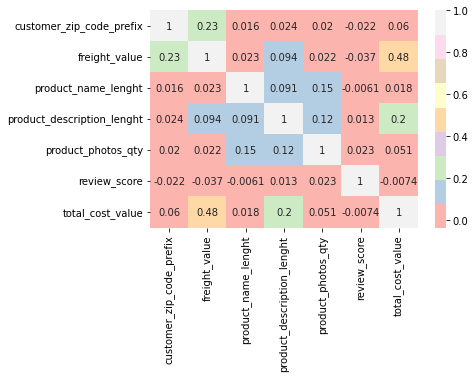

In [ ]:
sns.heatmap(df_pd_num.corr(),annot=True,cmap='Pastel1')

In [ ]:
df_pd_num.isnull().sum()

customer_zip_code_prefix      0
freight_value                 0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
review_score                  0
total_cost_value              0
dtype: int64

## 범주형 Feature

## Target Feature 정의

In [ ]:
df_pd['Delivery_Accuracy']= df_pd['order_estimated_delivery_date'] - df_pd['order_delivered_customer_date']

In [ ]:
df_pd['Delivery_Accuracy']=df_pd['Delivery_Accuracy'].dt.days

In [ ]:
df_pd['arrival_time']= np.where(df_pd['Delivery_Accuracy'] >= 0, 0,1)

In [ ]:
df_pd.groupby('arrival_time').mean()

,customer_zip_code_prefix,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,review_score,total_cost_value,Delivery_Accuracy
arrival_time,,,,,,,,,
0,34948.996511,118.755032,19.787522,48.792959,785.990134,2.209011,4.212189,138.542554,12.823127
1,36755.050131,136.544712,22.113668,48.619025,794.344940,2.188013,2.384335,158.658379,-9.629053


In [ ]:
df_pd.groupby('arrival_time').median()

,customer_zip_code_prefix,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,review_score,total_cost_value,Delivery_Accuracy
arrival_time,,,,,,,,,
0,24020.0,74.00,16.180,52.0,601.0,1.0,5.0,91.230,12.0
1,27914.0,79.99,17.215,51.0,602.0,1.0,1.0,99.925,-6.0


In [ ]:
y =df_pd['arrival_time'].copy()
y.value_counts()

0    100038
1     10712
Name: arrival_time, dtype: int64

Feature 별 유일한 값 개수 확인

In [ ]:
### 학습에 필요없는 변수 버리기
df_pd = df_pd.drop(['order_purchase_timestamp', 'order_delivered_carrier_date',
'order_delivered_customer_date', 'order_estimated_delivery_date',
'shipping_limit_date', 'customer_unique_id', 'seller_id', 'product_id',
'customer_zip_code_prefix','customer_city','customer_state','Delivery_Accuracy','product_category_name_english'],axis=1)

In [ ]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110750 entries, 0 to 110749
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   price                       110750 non-null  float64
 1   freight_value               110750 non-null  float64
 2   product_name_lenght         110750 non-null  float64
 3   product_description_lenght  110750 non-null  float64
 4   product_photos_qty          110750 non-null  float64
 5   review_score                110750 non-null  int64  
 6   total_cost_value            110750 non-null  float64
 7   arrival_time                110750 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 7.6 MB


In [ ]:
df_pd.isnull().sum()

price                         0
freight_value                 0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
review_score                  0
total_cost_value              0
arrival_time                  0
dtype: int64

Feature별 개수 시각화

Feature 인코딩 

In [ ]:
df_pd_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110750 entries, 0 to 110749
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customer_zip_code_prefix    110750 non-null  int64  
 1   freight_value               110750 non-null  float64
 2   product_name_lenght         110750 non-null  float64
 3   product_description_lenght  110750 non-null  float64
 4   product_photos_qty          110750 non-null  float64
 5   review_score                110750 non-null  int64  
 6   total_cost_value            110750 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 6.8 MB


상관계수 구하기

In [ ]:
df_pd.isnull().sum()

price                         0
freight_value                 0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
review_score                  0
total_cost_value              0
arrival_time                  0
dtype: int64

In [ ]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110750 entries, 0 to 110749
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   price                       110750 non-null  float64
 1   freight_value               110750 non-null  float64
 2   product_name_lenght         110750 non-null  float64
 3   product_description_lenght  110750 non-null  float64
 4   product_photos_qty          110750 non-null  float64
 5   review_score                110750 non-null  int64  
 6   total_cost_value            110750 non-null  float64
 7   arrival_time                110750 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 7.6 MB


< 최종 dataset >
Name Type Description			
Review rating score Ordinal Exact costumer review score			
Customer city Nominal Customer city name			
Customer state Nominal Customer state			
Price Continuous Item price			
Freight value Continuous Freight value of the item			
Product name length Discrete Number of characters extracted from the			
product name			
Product description length Discrete Number of characters extracted from the			
product description			
Product photos quantity Discrete Number of the available product photos			
Delivery accuracy Continuous order_estimated_delivery_date -			
order_delivered_customer_date			
Arrival time Binary			
Early/On time for positive or equal to zero			
delivery accuracy values			
Late for negative delivery accuracy values			
Total Value Continuous The sum of freight and product price value			
Target score Binary (two classes) Class 0: Low rating score (review score < 3)			
Class 1: High rating score (3 ≤ review score ≤ 5)			

In [ ]:
df_pd['arrival_time'].value_counts()

0    100038
1     10712
Name: arrival_time, dtype: int64

In [ ]:
df_pd_final = pd.concat([df_pd['arrival_time'],df_pd_num], axis=1)

In [ ]:
target =df_pd['arrival_time']
target

0         0
1         0
2         0
3         0
4         0
         ..
110745    0
110746    0
110747    0
110748    0
110749    0
Name: arrival_time, Length: 110750, dtype: int64

In [ ]:
X=df_pd_num
Y=df_pd["arrival_time"]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110750 entries, 0 to 110749
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customer_zip_code_prefix    110750 non-null  int64  
 1   freight_value               110750 non-null  float64
 2   product_name_lenght         110750 non-null  float64
 3   product_description_lenght  110750 non-null  float64
 4   product_photos_qty          110750 non-null  float64
 5   review_score                110750 non-null  int64  
 6   total_cost_value            110750 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 6.8 MB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,
                                               test_size=0.2)

In [ ]:
df_pd_final.isnull().sum().any()

False

In [ ]:
df_pd_final.head()

,arrival_time,customer_zip_code_prefix,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,review_score,total_cost_value
0,0,14409,21.88,41.0,1141.0,1.0,4,146.87
1,0,68030,24.90,41.0,1141.0,1.0,1,137.89
2,0,68030,24.90,41.0,1141.0,1.0,1,137.89
3,0,92480,15.62,41.0,1141.0,1.0,3,140.61
4,0,25931,30.59,41.0,1141.0,1.0,4,137.58


## 예측분석

In [ ]:
##################### 예측 분석 ############################3

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

## Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report

In [ ]:
#모델 생성
model=LogisticRegression()
model.fit(X_train,y_train)
lr_predictions=model.predict(X_test)

In [ ]:
#모델 평가
print("Accuracy score: {}".format(accuracy_score(y_test, lr_predictions)))
print("="*60)
print(classification_report(y_test, lr_predictions))

Accuracy score: 0.902076749435666
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     19984
           1       0.00      0.00      0.00      2166

    accuracy                           0.90     22150
   macro avg       0.45      0.50      0.47     22150
weighted avg       0.81      0.90      0.86     22150



In [ ]:
#Select KBest 적용 후 평가
X_new = SelectKBest(chi2, k=6).fit_transform(X,Y)

In [ ]:
X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(X_new,Y,test_size=0.2)

In [ ]:
model=LogisticRegression()
model.fit(X_new_train,y_new_train)
lr_predictions=model.predict(X_new_test)

In [ ]:
print("Accuracy score: {}".format(accuracy_score(y_new_test, lr_predictions)))
print("="*60)
print(classification_report(y_new_test, lr_predictions))

Accuracy score: 0.9050564334085779
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     20068
           1       0.40      0.02      0.04      2082

    accuracy                           0.91     22150
   macro avg       0.65      0.51      0.49     22150
weighted avg       0.86      0.91      0.86     22150



# SVM

In [ ]:
sc_x = StandardScaler() 
X_train_sc = sc_x.fit_transform(X_train)  
X_test_sc = sc_x.transform(X_test)

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train_sc,y_train)
clf_predictions=clf.predict(X_test_sc)

In [ ]:
print("Accuracy score: {}".format(accuracy_score(y_test, clf_predictions.round(), normalize=True)))
print("="*60)
print(classification_report(y_test, clf_predictions))

Accuracy score: 0.9022121896162528
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     19984
           1       0.00      0.00      0.00      2166

    accuracy                           0.90     22150
   macro avg       0.45      0.50      0.47     22150
weighted avg       0.81      0.90      0.86     22150



In [ ]:
#Select KBest 적용 후 평가
X_norm = MinMaxScaler().fit_transform(X)
X_new = SelectKBest(chi2, k=6).fit_transform(X_norm, Y)


X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(X_new,Y,
                                               test_size=0.20)

clf = svm.SVC(kernel='linear')
clf.fit(X_new_train,y_new_train)
clf_predictions=clf.predict(X_new_test)

print("Accuracy score: {}".format(accuracy_score(y_new_test, clf_predictions.round(), normalize=True)))
print("="*60)
print(classification_report(y_new_test, clf_predictions))

Accuracy score: 0.9032054176072235
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     20006
           1       0.00      0.00      0.00      2144

    accuracy                           0.90     22150
   macro avg       0.45      0.50      0.47     22150
weighted avg       0.82      0.90      0.86     22150



## RandomForest

In [ ]:
#모델 생성
rf = RandomForestRegressor(n_estimators=20, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
#모델 평가
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred.round())))

Accuracy score: 0.9194130925507901


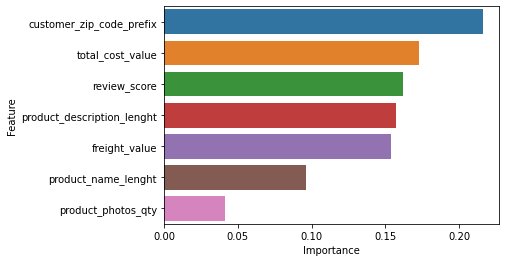

In [ ]:
#Feature Importrance
feat = X.columns.values
imp = rf.feature_importances_
df = pd.DataFrame({'Feature': feat, 'Importance': imp})
df = df.sort_values('Importance', ascending=False)[:10]
sns.barplot(x='Importance', y='Feature', data=df);

In [ ]:
trace = go.Scatter(
    y = rf.feature_importances_,
    x = X.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = X.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [ ]:
#SelectKBest 적용 후 평가
X_new = SelectKBest(chi2, k=6).fit_transform(X, Y)

X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(X_new,y,
                                               test_size=0.20)

rf = RandomForestRegressor(n_estimators=20, random_state=0)
rf.fit(X_new_train, y_new_train)
y_pred = rf.predict(X_new_test)

print("Accuracy score: {}".format(accuracy_score(y_new_test, y_pred.round())))

Accuracy score: 0.9188713318284424


## XGBoost

In [ ]:
#모델 생성
xgmodel=XGBClassifier()
xgmodel.fit(X_train,y_train)
y_pred = xgmodel.predict(X_test)

In [ ]:
#모델 평가
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred.round())))

Accuracy score: 0.9065462753950339


In [ ]:
#SelectKBest 적용 후 평가
X_new = SelectKBest(chi2, k=6).fit_transform(X, Y)

X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(X_new,Y,
                                               test_size=0.30)

xgmodel=XGBClassifier()
xgmodel.fit(X_new_train,y_new_train)
y_pred = xgmodel.predict(X_new_test)

print("Accuracy score: {}".format(accuracy_score(y_new_test, y_pred.round())))

Accuracy score: 0.9049510910458992


## 군집분석

군집 분석을 활용한 고객 Segmentation

In [ ]:
#K-Means Clustering
clustdata=df_pd_final[(df_pd_final.arrival_time == 0)]

In [ ]:
#Elbow 방법 적용
wcss=[]

for i in range(1,15):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(clustdata)
    wcss.append(kmeans.inertia_)
    

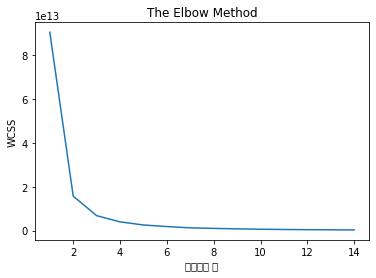

In [ ]:
plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('클러스터 수')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#cluster=2 설정
km = KMeans(n_clusters=2, init='k-means++', n_init=10)
c = km.fit_predict(clustdata) 
c

array([0, 1, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
clustdata["Cluster"]= c
clustdata.head()

,arrival_time,customer_zip_code_prefix,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,review_score,total_cost_value,Cluster
0,0,14409,21.88,41.0,1141.0,1.0,4,146.87,0
1,0,68030,24.90,41.0,1141.0,1.0,1,137.89,1
2,0,68030,24.90,41.0,1141.0,1.0,1,137.89,1
3,0,92480,15.62,41.0,1141.0,1.0,3,140.61,1
4,0,25931,30.59,41.0,1141.0,1.0,4,137.58,0


In [ ]:
clustdata.groupby(['Cluster']).mean()

,arrival_time,customer_zip_code_prefix,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,review_score,total_cost_value
Cluster,,,,,,,,
0,0.0,17946.382566,17.593447,48.704690,773.986877,2.182654,4.219041,131.440951
1,0.0,78799.571858,25.446150,49.020607,816.947122,2.276985,4.194519,156.857937


군집화된 데이터 scailing


In [ ]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(clustdata) 

X_normalized = normalize(X_scaled) 
X_normalized = pd.DataFrame(X_normalized)

PCA 적용 (n=2)

In [ ]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2']

In [ ]:
c1 = km.fit_predict(X_principal) 
c1

array([0, 1, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
result=pd.DataFrame({'P1' : X_principal.iloc[:,0] ,'P2' : X_principal.iloc[:,1]})
result['Cluster']=pd.Series(c1, index=result.index)
result.head()

,P1,P2,Cluster
0,-0.414731,0.524104,0
1,0.757546,0.259822,1
2,0.757546,0.259822,1
3,0.941963,0.331562,1
4,-0.162908,0.518269,0


주성분-클러스터 그래프

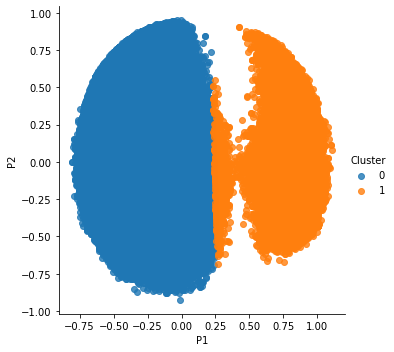

In [ ]:
import seaborn as sns
facet = sns.lmplot(data=result,x='P1',y='P2',hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True)

In [ ]:
result['Cluster'].value_counts()

0    71420
1    28618
Name: Cluster, dtype: int64

PCA 후 Elbow 방법 적용

In [ ]:
wcss=[]

for i in range(2,15):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_principal)
    wcss.append(kmeans.inertia_)

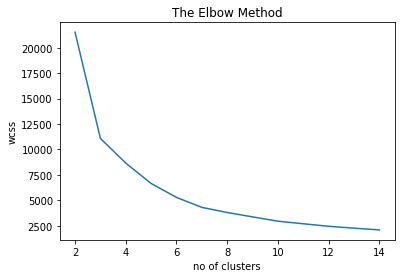

In [ ]:
plt.plot(range(2,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='k-means++', n_init=10)
c = km.fit_predict(X_principal) 
c

array([2, 0, 0, ..., 1, 0, 0], dtype=int32)

In [ ]:
result=pd.DataFrame({'P1' : X_principal.iloc[:,0] ,'P2' : X_principal.iloc[:,1]})
result['Cluster']=pd.Series(c, index=result.index)
result.head()

,P1,P2,Cluster
0,-0.414731,0.524104,2
1,0.757546,0.259822,0
2,0.757546,0.259822,0
3,0.941963,0.331562,0
4,-0.162908,0.518269,2


In [ ]:
새로운 주성분-클러스터 그래프

SyntaxError: ignored

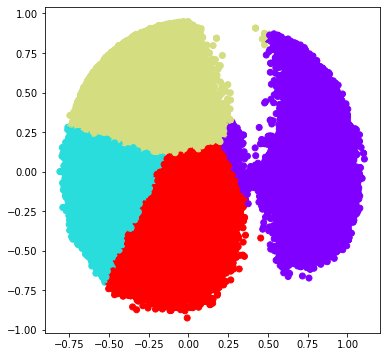

In [ ]:
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(result.iloc[:,0],result.iloc[:,1],c=result['Cluster'], cmap ='rainbow') 
plt.show()

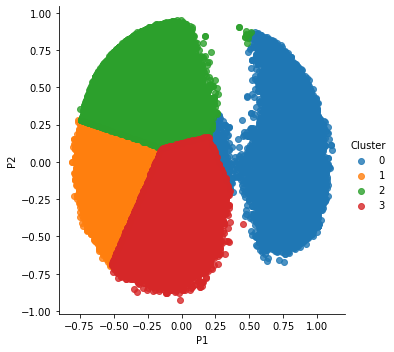

In [ ]:
import seaborn as sns
facet = sns.lmplot(data=result,x='P1',y='P2',hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True)